In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. 生成模拟数据
np.random.seed(42)

# 真实世界数据
real_world_data = np.random.normal(0, 1, 1000)

# ABM 估计数据 (100组)
abm_data = [np.random.normal(0, 1, 1000) for _ in range(100)]

In [ ]:
print(real_world_data)

In [3]:
# 2. 定义 ECDF 函数
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

In [4]:
# 3. 进行 KS 测试
def perform_ks_test(real_data, abm_data_list):
    p_values = []
    for abm_sample in abm_data_list:
        _, p_value = stats.ks_2samp(real_data, abm_sample)
        p_values.append(p_value)
    return p_values

p_values = perform_ks_test(real_world_data, abm_data)
print(p_values)
print(len(p_values))

[0.26347172719864703, 0.9802627322900355, 0.4006338815832625, 0.6101664688189142, 0.14836452078962484, 0.37012017606173, 0.6854967337920594, 0.8881734182535203, 0.9136894237272155, 0.4006338815832625, 0.7228251828701066, 0.7228251828701066, 0.5005673707894058, 0.7228251828701066, 0.9136894237272155, 0.7228251828701066, 0.7946637387576738, 0.4659595288557257, 0.8282194040312439, 0.43260886958153144, 0.6101664688189142, 0.19957365535779528, 0.9136894237272155, 0.5362766985932181, 0.9883339509983219, 0.7946637387576738, 0.7593695685682871, 0.07761108123267829, 0.6854967337920594, 0.7593695685682871, 0.5728904395829821, 0.28779764348473313, 0.18116454248303263, 0.24068202486600215, 0.3136800387320582, 0.9136894237272155, 0.4006338815832625, 0.9883339509983219, 0.37012017606173, 0.34112475112661245, 0.43260886958153144, 0.8282194040312439, 0.8282194040312439, 0.43260886958153144, 0.9802627322900355, 0.7228251828701066, 0.07761108123267829, 0.7946637387576738, 0.3136800387320582, 0.998723451

In [5]:
# 4. 分析结果
alpha = 0.05
not_rejected = sum(p > alpha for p in p_values)
not_rejected_ratio = not_rejected / len(p_values)

print(f"未被拒绝的测试比例: {not_rejected_ratio:.2f}")

未被拒绝的测试比例: 1.00


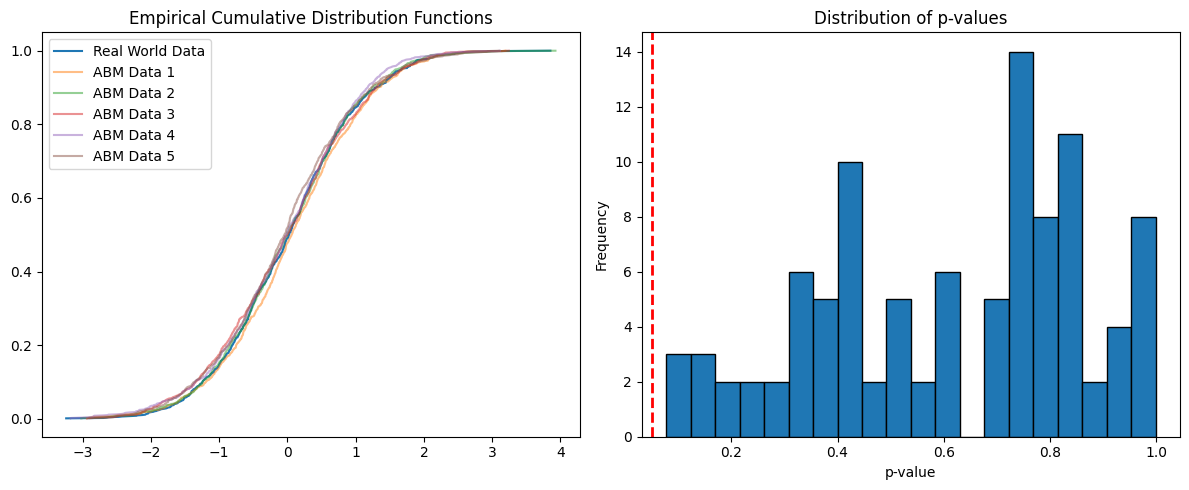

In [6]:
# 5. 可视化
plt.figure(figsize=(12, 5))

# ECDF 图
plt.subplot(1, 2, 1)
x_real, y_real = ecdf(real_world_data)
plt.plot(x_real, y_real, label='Real World Data')

for i in range(5):  # 只画5条ABM数据的ECDF以避免过于混乱
    x_abm, y_abm = ecdf(abm_data[i])
    plt.plot(x_abm, y_abm, alpha=0.5, label=f'ABM Data {i+1}')

plt.title('Empirical Cumulative Distribution Functions')
plt.legend()

# p值分布图
plt.subplot(1, 2, 2)
plt.hist(p_values, bins=20, edgecolor='black')
plt.axvline(alpha, color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
# 6. 结论
if not_rejected_ratio > 0.95:
    print("结论: ABM模型很好地模拟了真实世界数据。")
elif not_rejected_ratio > 0.8:
    print("结论: ABM模型表现良好，但可能需要一些微调。")
else:
    print("结论: ABM模型可能需要显著调整。")

结论: ABM模型很好地模拟了真实世界数据。
